<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5><em>k</em>-means Clustering</font></h1>

## Introduction

There are many models for clustering out there. In this lab, we will be presenting the model that is considered the one of the simplest model among them. Despite its simplicity, *k*-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data.

Some real-world applications of *k*-means include:
- customer segmentation,
- understand what the visitors of a website are trying to accomplish,
- pattern recognition, and,
- data compression.

In this lab, we will learn *k*-means clustering with 3 examples:
- *k*-means on a randomly generated dataset.
- Using *k*-means for customer segmentation.

## Table of Contents

1. <a href="#item1"><em>k</em>-means on a Randomly Generated Dataset</a>    
2. <a href="#item2">Using <em>k</em> for Customer Segmentation</a> 


Before we start with the main lab content, let's download all the dependencies that we will need.

In [1]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

## 1. *k*-means on a Randomly Generated Dataset

Let's first demonstrate how *k*-means works with an example of engineered datapoints. 

#### 30 data points belonging to 2 different clusters (x1 is the first feature and x2 is the second feature)

In [2]:
# data
x1 = [-4.9, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [-3.5, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]

print('Datapoints defined!')

Datapoints defined!


#### Define a function that assigns each datapoint to a cluster

In [3]:
colors_map = np.array(['b', 'r'])
def assign_members(x1, x2, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(x1) - centers[0][0]) + np.square(np.array(x2) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(x1) - centers[1][0]) + np.square(np.array(x2) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


#### Define a function that updates the centroid of each cluster

In [4]:
# update means
def update_centers(x1, x2, class_of_points):
    center1 = [np.mean(np.array(x1)[~class_of_points]), np.mean(np.array(x2)[~class_of_points])]
    center2 = [np.mean(np.array(x1)[class_of_points]), np.mean(np.array(x2)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


#### Define a function that plots the data points along with the cluster centroids

In [5]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


#### Initialize *k*-means - plot data points

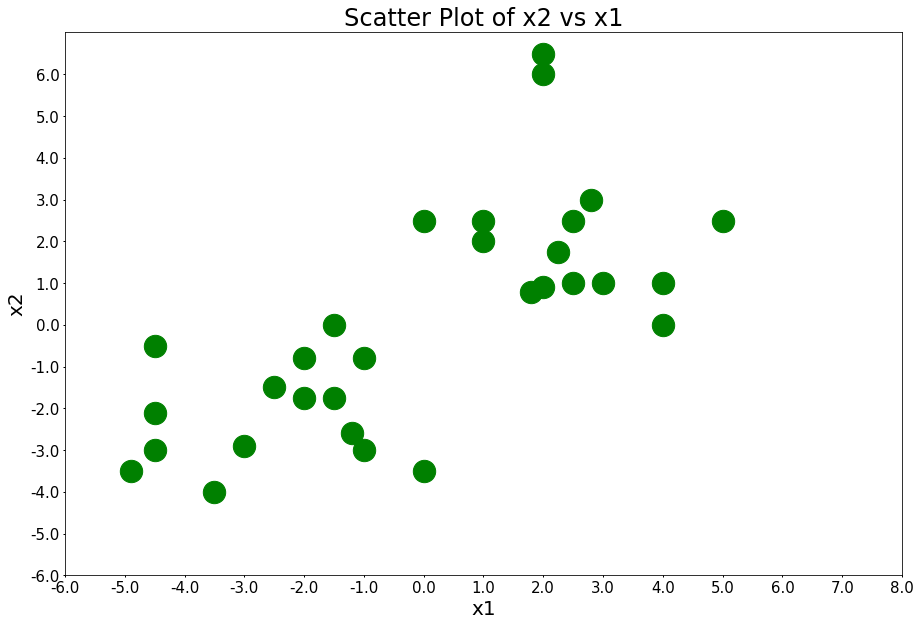

In [6]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

#### Initialize *k*-means - randomly define clusters and add them to plot

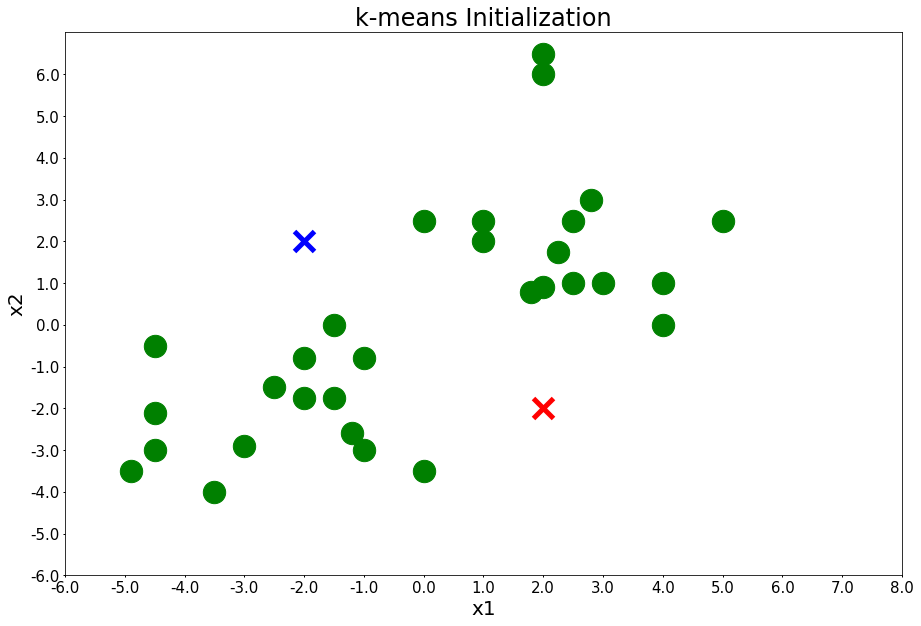

In [7]:
centers = [[-2, 2], [2, -2]]
plot_points(centers, figure_title='k-means Initialization')

#### Run *k*-means (4-iterations only)

Iteration 1 - Press Enter to update the members of each cluster 2


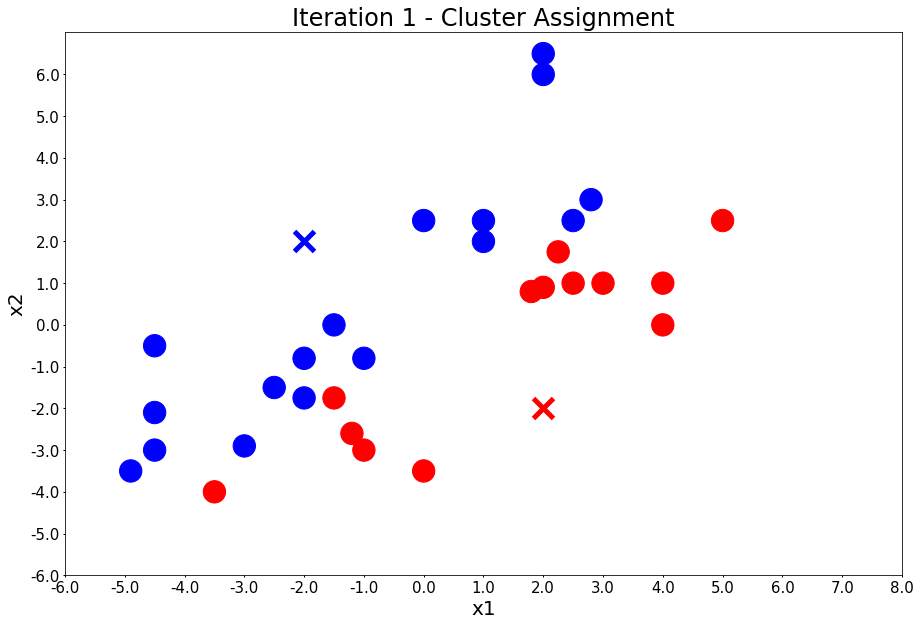

Iteration 1 - Press Enter to update the centers 4,4,4


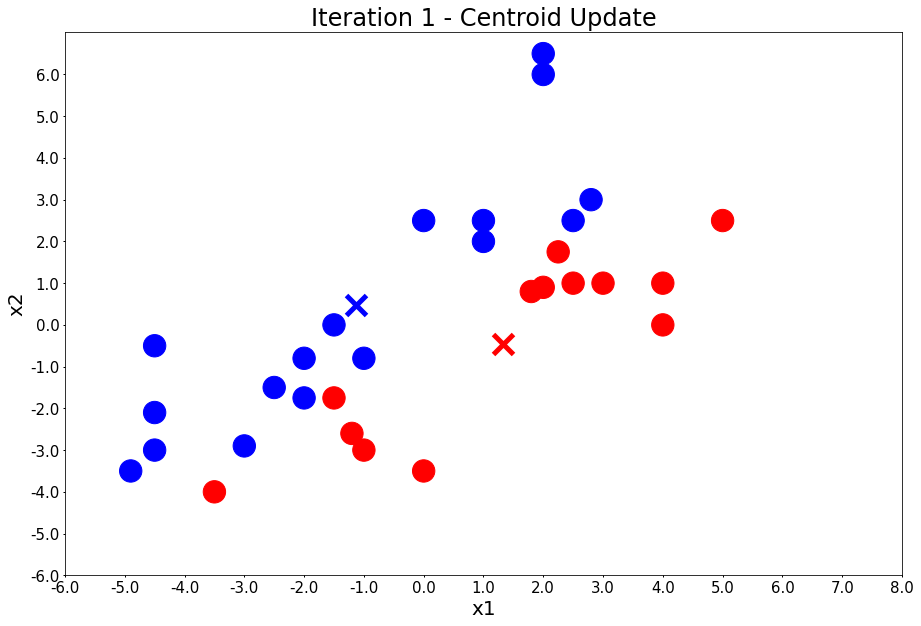

Iteration 2 - Press Enter to update the members of each cluster 1


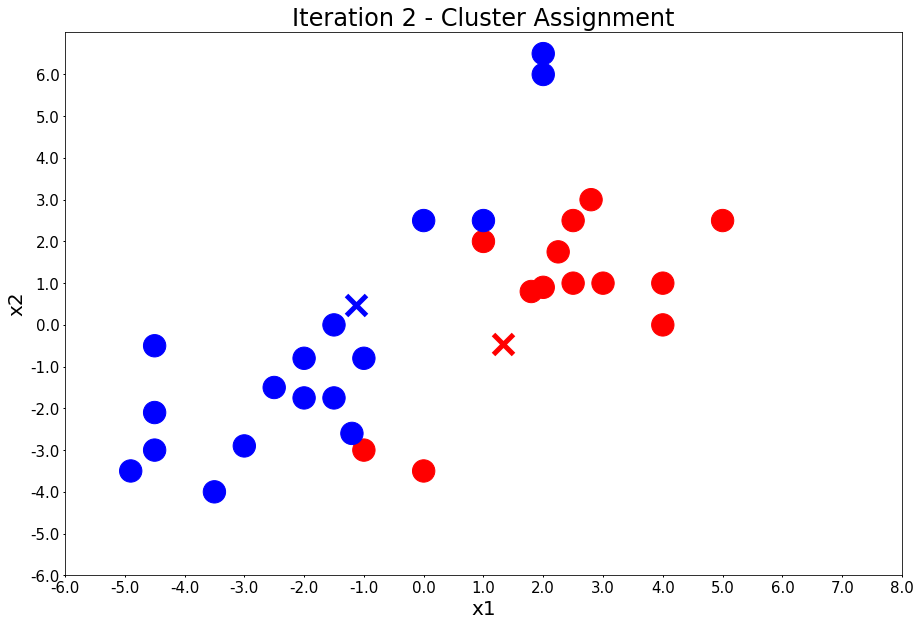

Iteration 2 - Press Enter to update the centers 2


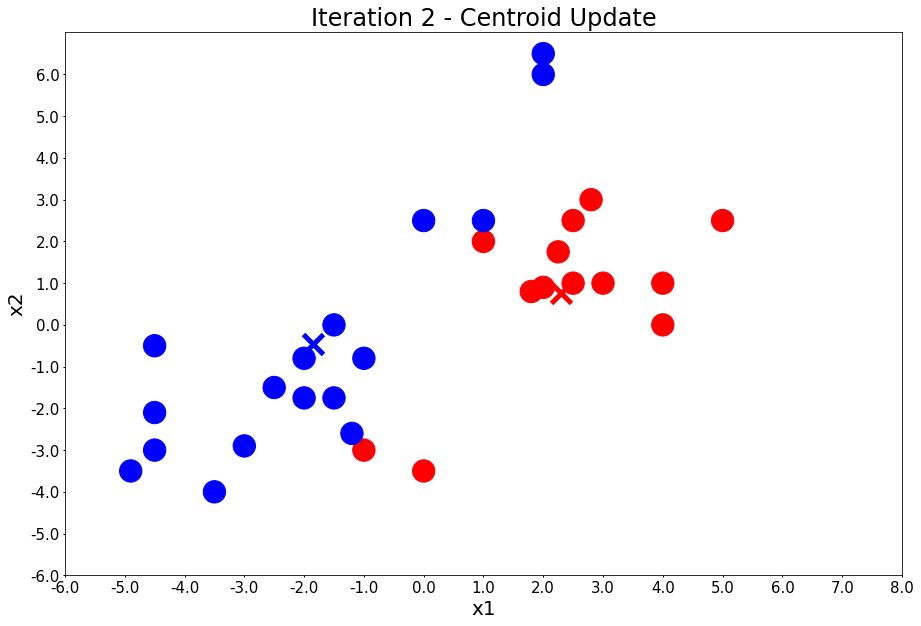

Iteration 3 - Press Enter to update the members of each cluster 6


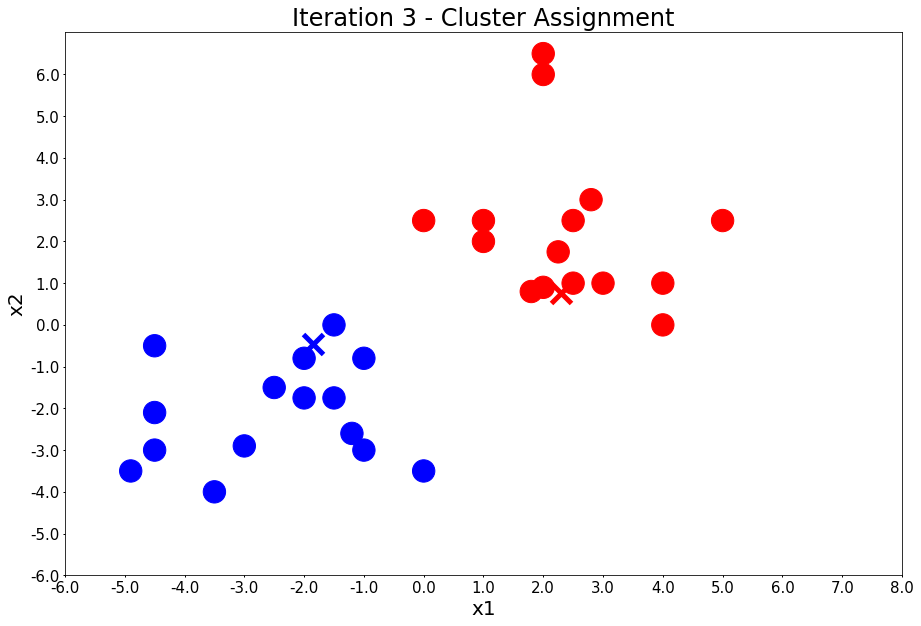

Iteration 3 - Press Enter to update the centers 4


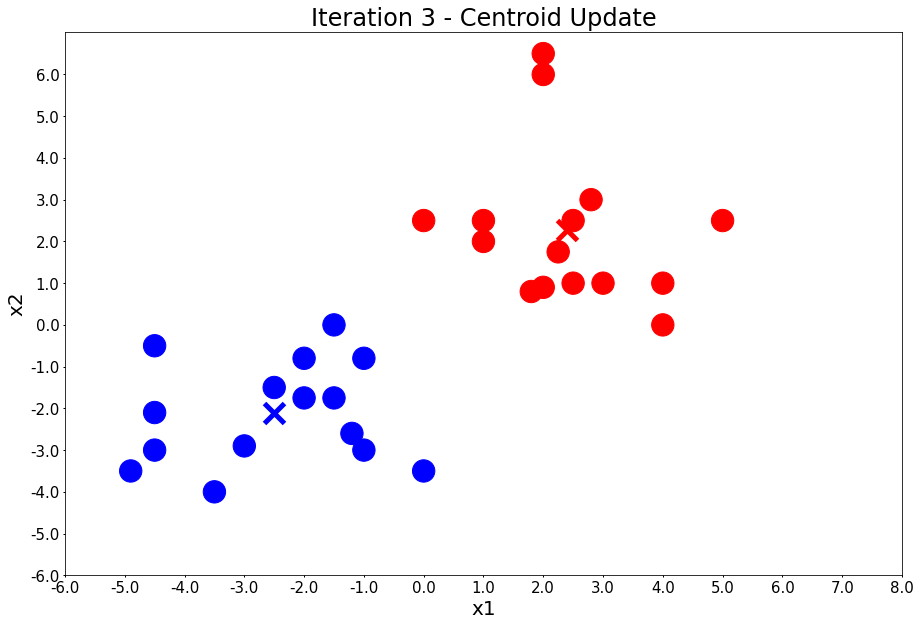

Iteration 4 - Press Enter to update the members of each cluster 7


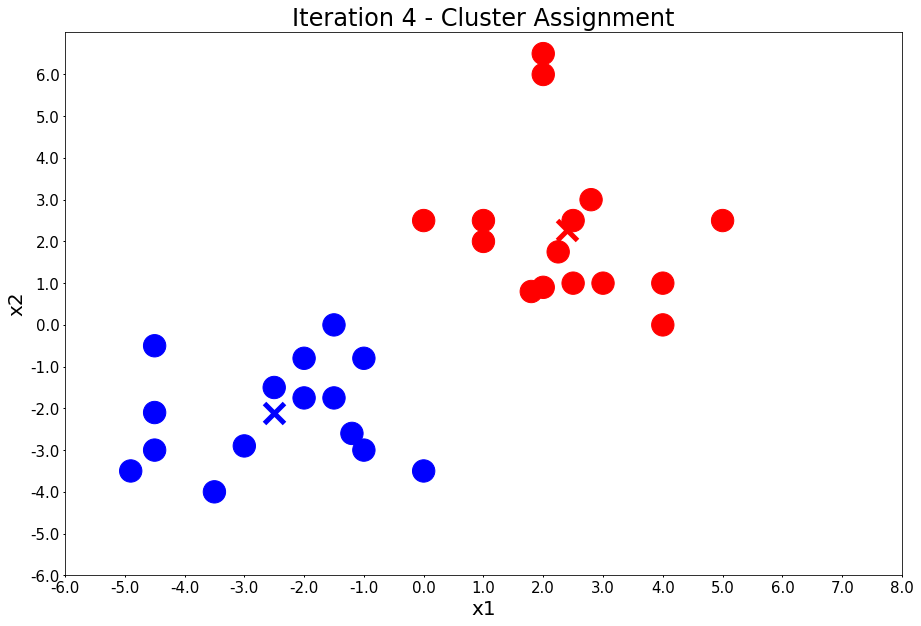

Iteration 4 - Press Enter to update the centers 3


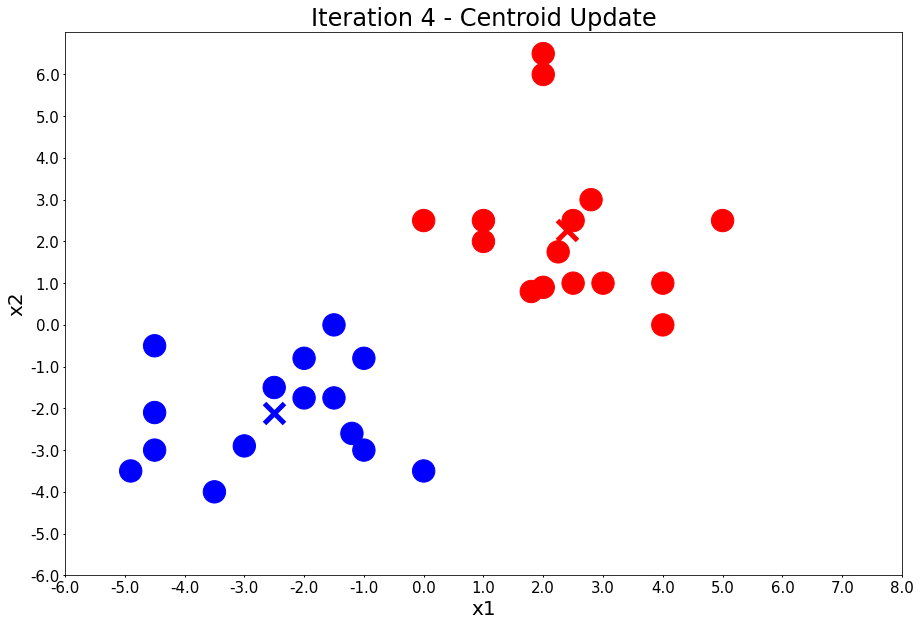

In [8]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(x1, x2, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(x1, x2, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

Now, we have visually observed how <em>k</em>-means works, let's look at an example with many more datapoints. For this example, we will use the <strong>random</strong> library to generate thousands of datapoints.

### Generating the Data

First, we need to set up a random seed. We use the Numpy's **random.seed()** function, and we will set the seed to 0. In other words, **random.seed(0)**.

In [9]:
np.random.seed(0)

Next we will be making *random clusters* of points by using the **make_blobs** class. The **make_blobs** class can take in many inputs, but we will use these specific ones.

<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>

<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>



In [10]:
X, y = make_blobs(n_samples=5000, centers=[[4, 4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

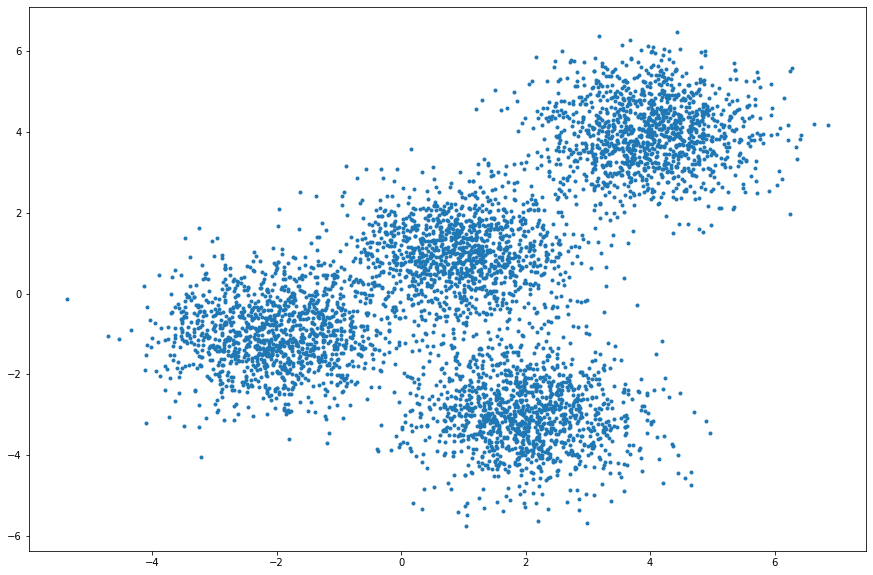

In [11]:
plt.figure(figsize=(15, 10))
plt.scatter(X[:, 0], X[:, 1], marker='.')

### Setting up *k*-means

Now that we have our random data, let's set up our *k*-means clustering.

The KMeans class has many parameters that can be used, but we will use these three:
<ul>
    <li> <strong>init</strong>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++". k-means++ selects initial cluster centers for <em>k</em>-means clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <strong>n_clusters</strong>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <strong>n_init</strong>: Number of times the <em>k</em>-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called **k_means**.

In [12]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>.

In [13]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Now let's grab the labels for each point in the model using KMeans **.labels\_** attribute and save it as **k_means_labels**.

In [14]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans **.cluster\_centers\_** and save it as **k_means_cluster_centers**.

In [15]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### Visualizing the Resulting Clusters

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what the clusters look like.

Please read through the code and comments to understand how to plot the model.

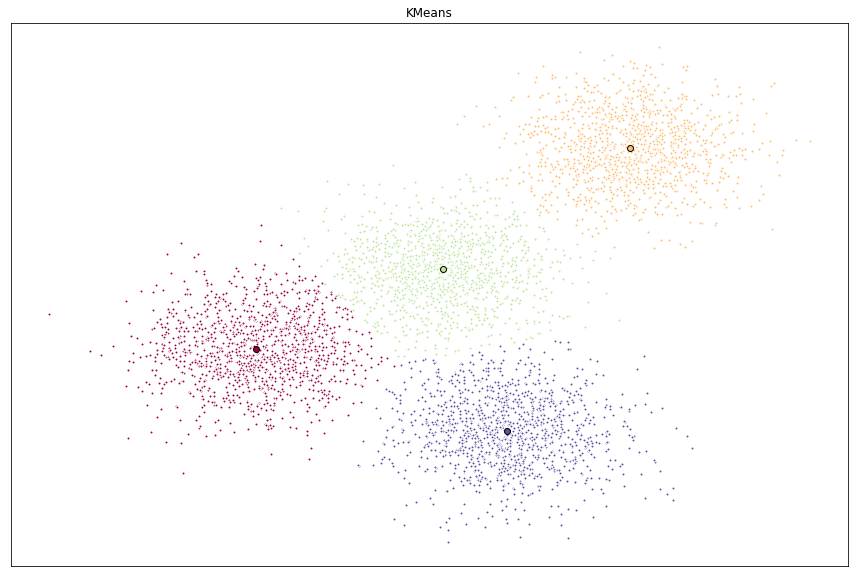

In [16]:
# initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(15, 10))

# colors uses a color map, which will produce an array of colors based on
# the number of labels. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# create a plot
ax = fig.add_subplot(1, 1, 1)

# loop through the data and plot the datapoints and centroids.
# k will range from 0-3, which will match the number of clusters in the dataset.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # create a list of all datapoints, where the datapoitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # plot the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # plot the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# title of the plot
ax.set_title('KMeans')

# remove x-axis ticks
ax.set_xticks(())

# remove y-axis ticks
ax.set_yticks(())

# show the plot
plt.show()

<a id='item2'></a>

## 2. Using *k*-means for Customer Segmentation

Imagine that you have a customer dataset, and you are interested in exploring the behavior of your customers using their historical data.

Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe to a service. A business task is to retain those customers. Another group might include customers from non-profit organizations, and so on.

### Downloading Data

Let's download the data and save it as a CSV file called **customer_segmentation.csv**

In [17]:
!wget -q -O 'customer_segmentation.csv' https://cocl.us/customer_dataset
print('Data downloaded!')

Data downloaded!


Now that the data is downloaded, let's read it into a *pandas* dataframe.

In [ ]:
customers_df = pd.read_csv('customer_segmentation.csv')
customers_df.head()

### Pre-processing

As you can see, **Address** in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [ ]:
df = customers_df.drop('Address', axis=1)
df.head()

Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use **StandardScaler()** to normalize our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

### Modeling

Let's run our model and group our customers into three clusters.

In [ ]:
num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_

print(labels)

<h2 id="insights">Insights</h2>

Note that each row in our dataset represents a customer, and therefore, each row is assigned a label.

In [ ]:
df["Labels"] = labels
df.head(5)

We can easily check the centroid values by averaging the features in each cluster.

In [ ]:
df.groupby('Labels').mean()

<em>k</em>-means will partition your customers into three groups since we specified the algorithm to generate 3 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- OLDER, HIGH INCOME, AND INDEBTED
- MIDDLE AGED, MIDDLE INCOME, AND FINANCIALLY RESPONSIBLE
- YOUNG, LOW INCOME, AND INDEBTED

However, you can devise your own profiles based on the means above and come up with labels that you think best describe each cluster.

I hope that you are able to see the power of *k*-means here. This clustering algorithm provided us with insight into the dataset and lead us to group the data into three clusters. Perhaps the same results would have been achieved but using multiple tests and experiments.

### Thank you for completing this lab!

This notebook was created by [Saeed Aghabozorgi](https://ca.linkedin.com/in/saeedaghabozorgi) and [Alex Aklson](https://www.linkedin.com/in/aklson/). We hope you found this lab interesting and educational. Feel free to contact us if you have any questions!

This notebook is part of a course on **Coursera** called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week3_LAB1).

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).